In [12]:
import numpy as np
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [1]:
class LinearThresholdModel:
    def __init__(self, num_nodes, threshold):
        self.num_nodes = num_nodes
        self.threshold = threshold
        self.weights = np.zeros((num_nodes, num_nodes))
        self.activation = np.zeros(num_nodes)

    def set_connections(self, connections):
        self.weights = np.array(connections)

    def reset_activation(self):
        self.activation = np.zeros(self.num_nodes)

    def update_activation(self):
        new_activation = np.dot(self.weights, self.activation)
        self.activation = np.where(new_activation >= self.threshold, 1, 0)

    def run_model(self, num_iterations, seeds):
        results = []
        for _ in range(num_iterations):
            self.reset_activation()
            self.activation[seeds] = 1  # Activate the seed nodes simultaneously
            for _ in range(num_iterations):
                self.update_activation()
            results.append(self.activation.copy())
        return np.array(results)

In [14]:
# Function to read connectivity matrix from CSV file
def read_connectivity_matrix(file_path):
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        connectivity_matrix = []
        for row in reader:
            connectivity_matrix.append([float(val) for val in row])
    return connectivity_matrix

"""# Function to create and visualize a graph with a brain-like figure
def visualize_graph(connectivity_matrix, activation):
    G = nx.Graph()
    num_nodes = len(connectivity_matrix)
    
    # Add nodes to the graph
    for i in range(num_nodes):
        G.add_node(i, activation=activation[i])

    # Add edges to the graph
    for i in range(num_nodes):
        for j in range(num_nodes):
            if connectivity_matrix[i][j] > 0:
                G.add_edge(i, j)

    # Draw the graph with custom node shapes
    pos = nx.circular_layout(G)
    node_shapes = ['o' if G.nodes[i]['activation'] == 1 else '^' for i in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=['r' if G.nodes[i]['activation'] == 1 else 'b' for i in G.nodes], node_shape=node_shapes)
    plt.show()"""
def visualize_graph(connectivity_matrix, activation):
    G = nx.Graph()
    num_nodes = len(connectivity_matrix)
    
    # Add nodes to the graph
    for i in range(num_nodes):
        G.add_node(i, activation=activation[i])

    # Add edges to the graph
    for i in range(num_nodes):
        for j in range(num_nodes):
            if connectivity_matrix[i][j] > 0:
                G.add_edge(i, j)

    # Draw the graph with custom node shapes
    pos = nx.circular_layout(G)
    node_colors = ['r' if G.nodes[i]['activation'] == 1 else 'b' for i in G.nodes]
    activated_nodes = [node for node, act in G.nodes(data='activation') if act == 1]
    non_activated_nodes = [node for node, act in G.nodes(data='activation') if act == 0]
    
    nx.draw_networkx_nodes(G, pos, nodelist=activated_nodes, node_color='r', node_shape='o', node_size=300, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=non_activated_nodes, node_color='b', node_shape='^', node_size=300, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    plt.show()


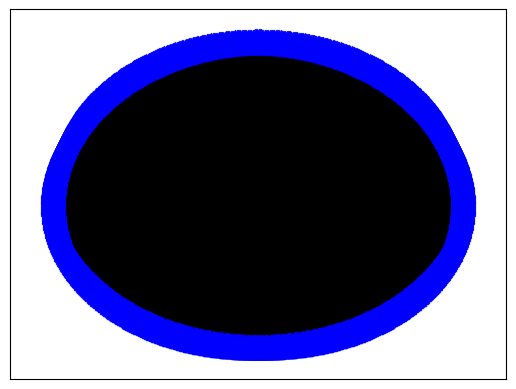

In [20]:
# Example usage:
if __name__ == "__main__":
    # Define the number of nodes and threshold
    num_nodes = 1054
    threshold = 0.5

    # Read the connectivity matrix from CSV file
    connectivity_matrix = read_connectivity_matrix('/Users/gabrieledele/Desktop/Hub_identification/gabriele_sc_connectomes/connectome_sub-102513.csv')

    # Create an instance of the linear threshold model
    ltm = LinearThresholdModel(num_nodes, threshold)

    # Set the connections using the connectivity matrix
    ltm.set_connections(connectivity_matrix)

    # Define seeds for the competitive scenario
    seed1 = 5
    seed2 = 2

    # Run the model for 10,000 iterations with two different seeds
    num_iterations = 1
    results_seed1 = ltm.run_model(num_iterations, seeds=[seed1])
    results_seed2 = ltm.run_model(num_iterations, seeds=[seed2])

    # Calculate the number of times each node was activated for each seed
    activations_seed1 = np.sum(results_seed1, axis=0)
    activations_seed2 = np.sum(results_seed2, axis=0)

    # Visualize the graph with activation states
    visualize_graph(connectivity_matrix, activations_seed1)

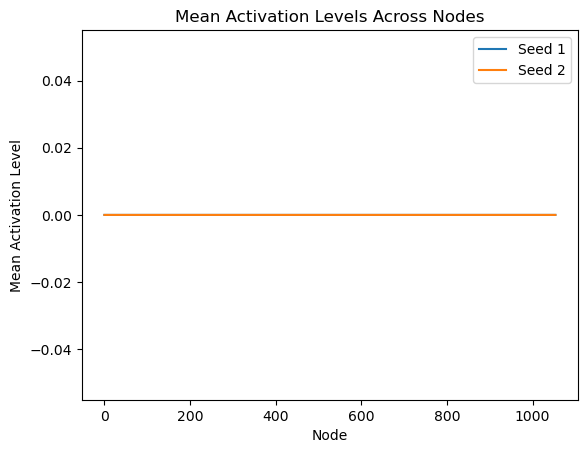

In [18]:
import numpy as np
import csv
import matplotlib.pyplot as plt

class LinearThresholdModel:
    def __init__(self, num_nodes, threshold):
        self.num_nodes = num_nodes
        self.threshold = threshold
        self.weights = np.zeros((num_nodes, num_nodes))
        self.activation = np.zeros(num_nodes)

    def set_connections(self, connections):
        self.weights = np.array(connections)

    def reset_activation(self):
        self.activation = np.zeros(self.num_nodes)

    def update_activation(self):
        new_activation = np.dot(self.weights, self.activation)
        self.activation = np.where(new_activation >= self.threshold, 1, 0)

    def run_model(self, num_iterations, seeds):
        results = []
        for _ in range(num_iterations):
            self.reset_activation()
            self.activation[seeds] = 1  # Activate the seed nodes simultaneously
            for _ in range(num_iterations):
                self.update_activation()
            results.append(self.activation.copy())
        return np.array(results)

# Function to read connectivity matrix from CSV file
def read_connectivity_matrix(file_path):
    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        connectivity_matrix = []
        for row in reader:
            connectivity_matrix.append([float(val) for val in row])
    return connectivity_matrix

# Example usage:
if __name__ == "__main__":
    # Define the number of nodes and threshold
    num_nodes = 1054
    threshold = 0.5

    # Read the connectivity matrix from CSV file
    connectivity_matrix = read_connectivity_matrix('/Users/gabrieledele/Desktop/Hub_identification/gabriele_sc_connectomes/connectome_sub-102513.csv')

    # Create an instance of the linear threshold model
    ltm = LinearThresholdModel(num_nodes, threshold)

    # Set the connections using the connectivity matrix
    ltm.set_connections(connectivity_matrix)

    # Define seeds for the competitive scenario
    seed1 = 8
    seed2 = 2

    # Run the model for 10,000 iterations with two different seeds
    num_iterations = 10
    results_seed1 = ltm.run_model(num_iterations, seeds=[seed1])
    results_seed2 = ltm.run_model(num_iterations, seeds=[seed2])

    # Calculate the mean activation levels across iterations
    mean_activation_seed1 = np.mean(results_seed1, axis=0)
    mean_activation_seed2 = np.mean(results_seed2, axis=0)

    # Plot the mean activation levels
    plt.plot(mean_activation_seed1, label='Seed 1')
    plt.plot(mean_activation_seed2, label='Seed 2')
    plt.xlabel('Node')
    plt.ylabel('Mean Activation Level')
    plt.title('Mean Activation Levels Across Nodes')
    plt.legend()
    plt.show()

In [10]:
from igraph import Graph, VertexSeq, plot
from igraph import *
import random
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import matplotlib.pyplot as plt
import igraph as ig
ig.config["plotting.backend"] = "matplotlib"
g = ig.Graph.Famous("petersen")
ig.plot(g)
plt.show()

TypeError: plotting not available

In [11]:
g = Graph.Read_Adjacency('/Users/gabrieledele/Desktop/Hub_identification/gabriele_sc_connectomes/connectome_sub-102513.csv', sep=',')

vs = VertexSeq(g)

nodes = Graph.vcount(g)
edg = Graph.ecount(g)
print(nodes, edg)

#g = Graph.Watts_Strogatz(dim=1, size=10, nei=10, p=0.3)
#plot(g)
#plt.show()

1054 0


In [12]:
"""
- [x] Prepare a WS network with about 20 nodes
- [ ] Implement the Threshold Activation Model (Linear Threshold)
    - we randomly select m nodes from the network
    - activation attempt is given, which determines what percentage of nodes in the neighborhood is required to activate the node
    - in the first step of the simulation (t0), we randomly activate m nodes (seed set) and mark them in red
    - in the next steps, for each node we check the state of its neighbors and if the number of active nodes is <= n,
    we change the node status to active (red)
    - the process continues until no further activations occur
    - in each step we save the number of active nodes to the file
    - graph states to check the correctness of the process, documented in individual visualizations
"""

from copy import deepcopy


def seeding(g, m):
    """
    Random initialization of m nodes in graph g
    :param g: graph
    :param m: number of nodes to activate
    """
    indexes = g.vs.indices
    indexes_to_activate = random.sample(indexes, m)
    g.vs[indexes_to_activate]["activated"] = True


def update_colors(g):
    """
    :param g: graph
    """
    activated_indexes = list(np.where(g.vs["activated"])[0])
    g.vs[activated_indexes]["color"] = "red"


def update_labels(g):
    """
    :param g: graph
    """
    for i in g.vs.indices:
        g.vs[i]["neighbors_activated_count"] = np.sum([g.vs[n]["activated"] for n in g.neighbors(g.vs[i])])
    g.vs["label"] = [(g.vs.indices[i], g.vs[i]["neighbors_activated_count"], g.vs[i]["neighbors_count"]) for i in
                     range(len(g.vs.indices))]


def simulation_step(g, n):
    """
    Perform single iteration. For each node check if percentage of activated neighbors exceed
    threshold defined by n.
    :param g: graph
    :param n: threshold, required ratio of activated neighbors to activate
    """
    has_activation_happened = False
    for i in g.vs.indices:
        if not g.vs[i]["activated"]:
            neighbors_count = g.vs[i]["neighbors_count"]
            if neighbors_count:
                neighbors_activated_count = g.vs[i]["neighbors_activated_count"]
                neighbors_activated_ratio = neighbors_activated_count/neighbors_count
                if neighbors_activated_ratio > n:
                    g.vs[i]["activated"] = True
                    has_activation_happened = True

    update_colors(g)
    update_labels(g)
    activated_nodes_count = np.sum(g.vs["activated"])
    return g, activated_nodes_count, has_activation_happened


def simulation(g, m, n):
    g.vs["activated"] = False
    for i in g.vs.indices:
        g.vs[i]["neighbors_count"] = len(g.neighbors(g.vs[i]))
    g.vs["color"] = "orange"
    g.vs["size"] = 50

    seeding(g, m=m)
    update_colors(g)
    update_labels(g)
    # plot(g)

    g_history = [deepcopy(g)]
    activated_nodes_counts = [np.sum(g.vs["activated"])]
    has_activation_happened = True
    while has_activation_happened:
        g, activated_nodes_count, has_activation_happened = simulation_step(g, n)
        g_history.append(deepcopy(g))
        activated_nodes_counts.append(activated_nodes_count)
        # plot(g)
    return g_history, activated_nodes_counts


def main():
    g = Graph.Read_Adjacency('/Users/gabrieledele/Desktop/Hub_identification/gabriele_sc_connectomes/connectome_sub-102513.csv', sep=',')
    g_history, activated_nodes_counts = simulation(g, m=5, n=0.3)
    plt.plot(activated_nodes_counts)
    plt.show()

    for g in g_history:
        plot(g)


if __name__ == '__main__':
    # main()
    g = Graph.Read_Adjacency('/Users/gabrieledele/Desktop/Hub_identification/gabriele_sc_connectomes/connectome_sub-102513.csv', sep=',')
    plot(g)

TypeError: plotting not available